In [1]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')  
%matplotlib inline

# Create our portfolio of equities
raw = pd.read_csv('data/Holdings.csv')
tickers = raw['Ticker'].tolist()
 
# Download closing prices
data = pd.read_csv('data/pricing.csv')
data = data.set_index('Date')
 
# From the closing prices, calculate periodic returns
returns = data.pct_change()

# Preview the data
data.tail()

,V,TYL,XYL,EOG,ADM,LUV,DVN,PH,QCOM,APD,...,WEC,OGN,CRM,MO,ULTA,MPC,WAT,HIG,ALL,NVDA
Date,,,,,,,,,,,,,,,,,,,,,
2022-05-10 00:00:00,193.580002,354.660004,82.629997,119.559998,84.970001,44.590000,63.759998,264.405731,136.809998,230.679993,...,100.660004,34.759998,167.149994,51.570000,380.869995,91.720001,321.429993,70.019997,129.589996,175.949997
2022-05-11 00:00:00,196.720001,340.480011,80.889999,121.290001,84.360001,43.009998,64.680000,263.559998,132.300003,232.889999,...,101.750000,33.349998,161.270004,51.689999,375.950012,91.959999,311.660004,69.800003,128.550003,166.300003
2022-05-12 00:00:00,193.970001,345.200012,82.790001,120.510002,84.440002,42.330002,64.610001,260.440002,131.770004,231.410004,...,100.820000,34.630001,160.419998,52.169998,377.850006,92.739998,313.950012,69.099998,127.550003,161.750000
2022-05-13 00:00:00,199.229996,358.359985,83.910004,124.279999,85.389999,42.990002,68.699997,265.350006,134.929993,233.710007,...,102.089996,34.939999,166.910004,53.040001,395.890015,95.879997,320.420013,69.550003,128.190002,177.059998
2022-05-16 00:00:00,197.809998,345.420013,81.800003,126.360001,87.180000,43.180000,70.989998,265.399994,133.910004,232.919998,...,102.769997,35.430000,164.119995,53.740002,393.160004,96.470001,320.929993,69.260002,127.250000,172.639999


Text(0, 0.5, 'price ($)')

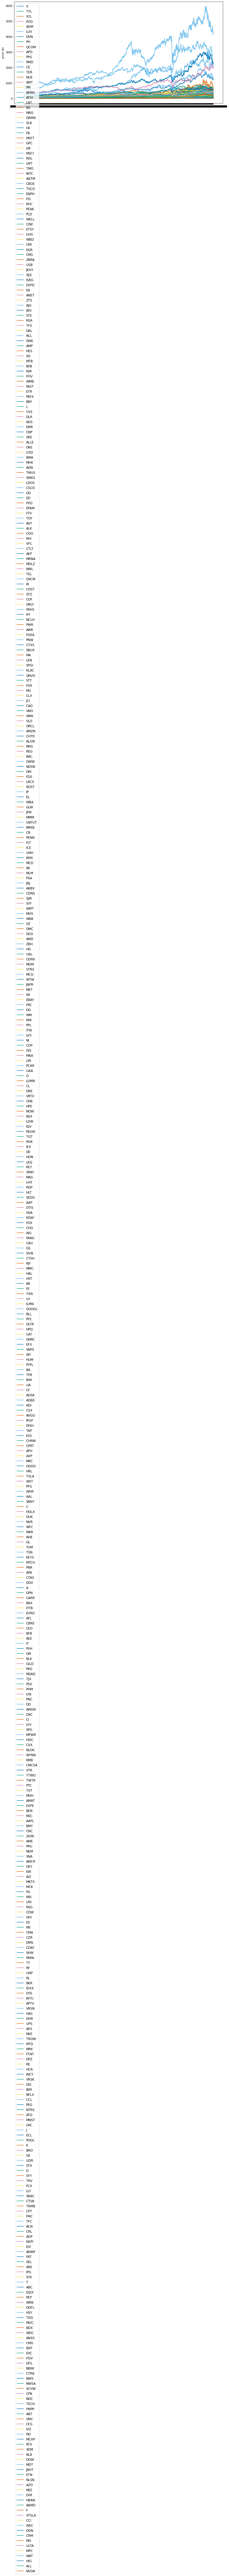

In [2]:
plt.figure(figsize=(14, 7))
for i in data.columns.values:
    plt.plot(data.index, data[i], lw=2, alpha=0.8,label=i)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price ($)')

Text(0, 0.5, 'daily returns')

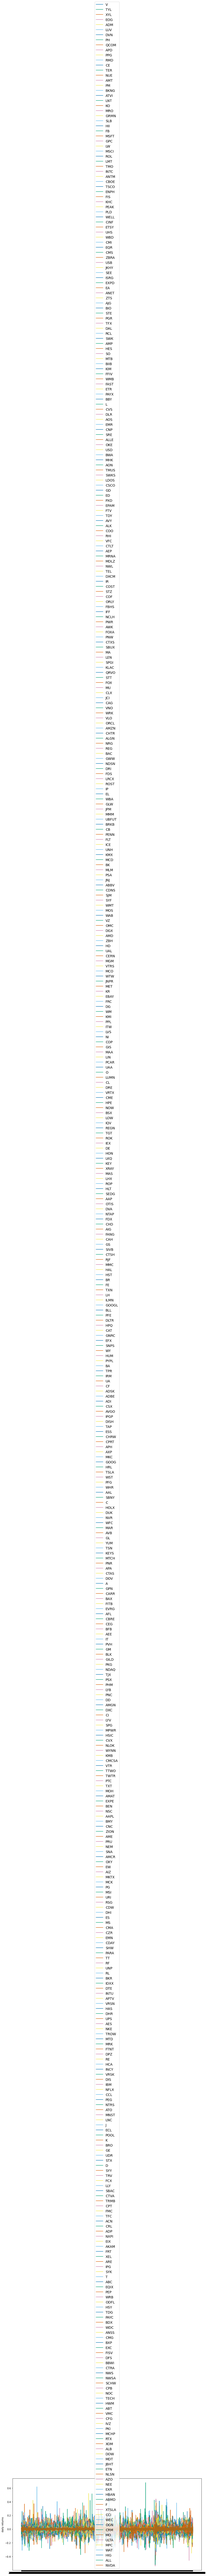

In [3]:
returns = data.pct_change()

plt.figure(figsize=(14, 7))
for i in returns.columns.values:
    plt.plot(returns.index, returns[i], lw=2, alpha=0.8,label=i)
plt.legend(loc='lower center', fontsize=14)
plt.ylabel('daily returns')

In [4]:
# Define function to calculate returns, volatility
def portfolio_annualized_performance(weights, mean_returns, cov_matrix):
    # Given the avg returns, weights of equities calc. the portfolio return
    returns = np.sum(mean_returns*weights ) *252
    # Standard deviation of portfolio (using dot product against covariance, weights)
    # 252 trading days
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns

In [5]:
def generate_random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    # Initialize array of shape 3 x N to store our results, 
    # where N is the number of portfolios we're going to simulate
    results = np.zeros((3,num_portfolios))
    # Array to store the weights of each equity
    weight_array = []
    for i in range(num_portfolios):
        # Randomly assign floats to our 4 equities
        weights = np.random.random(507)
        # Convert the randomized floats to percentages (summing to 100)
        weights /= np.sum(weights)
        # Add to our portfolio weight array
        weight_array.append(weights)
        # Pull the standard deviation, returns from our function above using 
        # the weights, mean returns generated in this function
        portfolio_std_dev, portfolio_return = portfolio_annualized_performance(weights, mean_returns, cov_matrix)
        # Store output
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        # Sharpe ratio
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weight_array

In [6]:
returns = data.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
# Number of portfolios to simulate
num_portfolios = 10000
# Risk free rate (used for Sharpe ratio below)
# anchored on treasury bond rates
risk_free_rate = 0.018

----------------------------------------------------------------------------------------------------
Portfolio at maximum Sharpe Ratio

--Returns, volatility--

Annualized Return: 0.19
Annualized Volatility: nan


--Allocation at max Sharpe ratio--

               V   TYL   XYL   EOG   ADM   LUV  DVN    PH  QCOM   APD  ...  \
allocation  0.02  0.07  0.32  0.38  0.25  0.39  0.1  0.27  0.32  0.33  ...   

             WEC   OGN   CRM   MO  ULTA   MPC   WAT   HIG   ALL  NVDA  
allocation  0.12  0.07  0.33  0.0   0.2  0.02  0.03  0.34  0.33  0.29  

[1 rows x 507 columns]
----------------------------------------------------------------------------------------------------


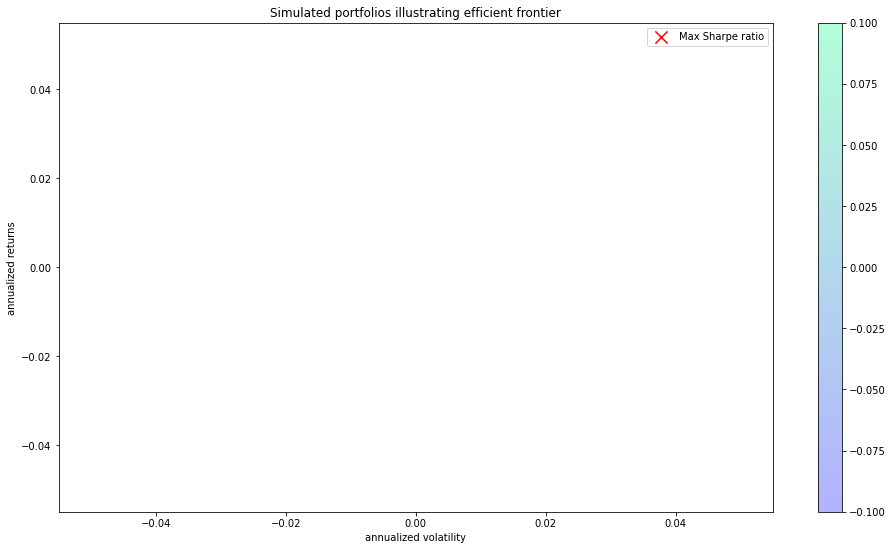

In [8]:
def display_simulated_portfolios(mean_returns, cov_matrix, num_portfolios, risk_free_rate):

    # pull results, weights from random portfolios
    results, weights = generate_random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    # pull the max portfolio Sharpe ratio (3rd element in results array from 
    # generate_random_portfolios function)
    max_sharpe_idx = np.argmax(results[2])

    # pull the associated standard deviation, annualized return w/ the max Sharpe ratio
    stdev_portfolio, returns_portfolio = results[0,max_sharpe_idx], results[1,max_sharpe_idx]

    # pull the allocation associated with max Sharpe ratio
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=data.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    print("-"*100)
    print("Portfolio at maximum Sharpe Ratio\n")
    print("--Returns, volatility--\n")
    print("Annualized Return:", round(returns_portfolio,2))
    print("Annualized Volatility:", round(stdev_portfolio,2))
    
    print("\n")
    print("--Allocation at max Sharpe ratio--\n")
    print(max_sharpe_allocation)
    print("-"*100)
    
    plt.figure(figsize=(16, 9))
    # x = volatility, y = annualized return, color mapping = sharpe ratio
    plt.scatter(results[0,:],results[1,:],c=results[2,:], cmap='winter', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    # Mark the portfolio w/ max Sharpe ratio
    plt.scatter(stdev_portfolio, returns_portfolio, marker='x',color='r',s=150, label='Max Sharpe ratio')
    plt.title('Simulated portfolios illustrating efficient frontier')
    plt.xlabel('annualized volatility')
    plt.ylabel('annualized returns')
    plt.legend(labelspacing=1.2)

display_simulated_portfolios(mean_returns, cov_matrix, num_portfolios, risk_free_rate)